In [1]:
from utils import * 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [17]:
l_fileexp = [
              "Optim_a",
              "Optim_b",
              "Optim_c",
              "Optim_d",
              "Optim_e",
              "Optim_f",
              "Optim_g",
              "Optim_h",
              "Optim_i",
              "Optim_j",
              "Optim_k",
              "Optim_l",
              "Optim_m",
              "Optim_n",
              "Optim_o",
              "Optim_p",
              "Optim_q",
              "Optim_r",
              "Optim_s",
              "Optim_t",
              "Optim_u",
              "Optim_v",
              "Optim_w",
              "Optim_x",
              "Optim_y",
              "Optim_z",
              "Optim_A",
              "Optim_B",
              "Optim_C",
              "Optim_E",
              "Optim_F",
              "Optim_1",
              "Optim_2",
              "Optim_3",
              "Optim_4",
              "Optim_5",
              "Optim_6",
              "Optim_7",
              "Optim_8",
              "Optim_9",
              "Optim_10",
              "Optim_11",
              "Optim_12",
              "Optim_13",
              "Optim_14",
              "Optim_15",
              "Optim_16",
              "Optim_17",
              "Optim_18",
              "Optim_19",
              "Optim_20",
              "Optim_21",
              "Optim_22",
              "Optim_23",
              "Optim_24",
              "Optim_25",
              "Optim_26",
              "Optim_27",
              "Optim_29",
              "Optim_30",
              "Optim_31",
              "Optim_32",
              "Optim_34",
              "Optim_35",
              "Optim_36",
              "Optim_37",
              "Optim_38",
              "Optim_39",
              "Optim_40",
              "Optim_41",
              "Optim_42",
              "Optim_43",
              "Optim_44",
              "Optim_45",
              "Optim_46",
              "Optim_47",
              "Optim_48",
              "Optim_49",
              "Optim_50",
              "Optim_51",
              "Optim_52",
              "Optim_53",
              "Optim_54",
              "Optim_55",
              "Optim_56",
              "Optim_57",
              "Optim_58",
              "Optim_59",
              "Optim_60",
              "Optim_61",
              "Optim_62",
              "Optim_63",
              "Optim_64",
              "Optim_65",
              "Optim_66",
              "Optim_67",
              "Optim_68",
              "Optim_69",
              "Optim_70",
              "Optim_71",
              "Optim_72",
              "2023-08-17-15:26:51_ev_world_No-V2G",
]

df_sum = summ_table(l_fileexp, l_fileexp)
df_sum["client"] = df_sum["client"]*0.064/0.14
df_sum["total"] = df_sum["client"] - df_sum["payoff"] - df_sum["transf"]
df_sum = df_sum.sort_values(by=['total'], ascending=False)
#df_sum = df_sum.sort_values(by=['transf'], ascending=True)
df_sum.head(10)

,name,transf,client,payoff,total
78,Optim_50,5426.028246,18301.238246,1322.424358,11552.785642
75,Optim_47,5142.860421,18301.238246,1624.009949,11534.367876
81,Optim_53,5531.072887,18301.238246,1245.419754,11524.745605
4,Optim_e,5068.726679,18301.238246,1709.904995,11522.606572
40,Optim_10,5088.522834,18301.238246,1733.129025,11479.586387
99,Optim_71,5412.890287,18301.238246,1409.325176,11479.022783
31,Optim_1,5245.174464,18301.238246,1611.005748,11445.058034
76,Optim_48,5150.798471,18301.238246,1738.206445,11412.233331
66,Optim_38,5397.431148,18301.238246,1500.412256,11403.394843
5,Optim_f,5246.722257,18301.238246,1653.623604,11400.892385


In [22]:
# Files
# df_asap, lines = load_res("2023-08-17-15:24:32_ev_world_ASAP")
l__fileexp = ["2023-08-17-15:24:32_ev_world_ASAP", 
              "2023-08-17-15:26:51_ev_world_No-V2G",
              "2023-08-30-18:33:29_ev_world_Optim",
              "2023-09-13-00:22:37_ev_world_Oracle_NoV2G",
              "2023-09-13-08:59:05_ev_world_Oracle",
              "2023-09-14-17:58:22_ev_world_Oracle",
              "2023-09-15-13:38:18_ev_world_Optim_eta1",
              "2023-09-15-13:38:36_ev_world_Oracle_eta1",
              "2023-10-10-20:18:07_ev_world_PPO-sep",
              "2023-10-12-18:18:56_ev_world_PPO-lay",
              "Optim_10"
              ]

l_exp = ["ASAP", "NoV2G", "Optim", "Oracle_NoV2G", "Oracle", "Oracle",
          "Optim_eta1", "Oracle_eta1", 
          "RL_untrained_sep", "RL_untrained_lay",
          "Optim_10"

            ] 
sum_cols = ["exp", "transf", "client", "payoff"]

df_sum = summ_table(l_exp, l__fileexp)
df_sum["client"] = df_sum["client"]*0.064/0.14
df_sum["total"] = df_sum["client"] - df_sum["payoff"] - df_sum["transf"]
df_sum.head(100)


,name,transf,client,payoff,total
0,ASAP,14240.008600,18301.238246,0.000000,4061.229647
1,NoV2G,7976.944281,18301.238246,0.000000,10324.293965
2,Optim,6704.185750,18301.238246,1535.107907,10061.944590
3,Oracle_NoV2G,7976.944277,18301.238246,0.000000,10324.293970
4,Oracle,6704.185743,18301.238246,1535.107907,10061.944597
5,Oracle,6704.185743,18301.238246,1535.107907,10061.944596
6,Optim_eta1,6335.623991,18301.238246,1592.657412,10372.956843
7,Oracle_eta1,6335.623984,18301.238246,1592.657412,10372.956850
8,RL_untrained_sep,12866.025643,18301.238246,1535.107907,3900.104696
9,RL_untrained_lay,12737.157629,18301.238246,1535.107907,4028.972710


In [3]:
df_sum.to_csv("df_sum.csv", index=False )

In [10]:
l_exp_1 = [f"lay_act_crit_{i}" for i in range(25)]
l_exp_2 = [f"lay_act_crit_smalrwd_{i}" for i in range(12)]
l_exp_3 = [f"sep_{i}" for i in range(10)]
l_exp_4 = [f"lay_small_lr_{i}" for i in range(10)]
l_exp_5 = [f"lay_slr_numsteps_{i}" for i in range(10)]
l_exp = l_exp_1 + l_exp_2 + l_exp_3 + l_exp_4 + l_exp_5

sum_cols = ["exp", "transf", "client", "payoff"]

df_sum2 = summ_table(l_exp, l_exp)
df_sum2.to_csv("df_sum2.csv", index=False )
df_sum2.head(10)

,name,transf,client,payoff,total
0,lay_act_crit_0,12974.041929,40033.958664,1535.107907,25524.808828
1,lay_act_crit_1,13052.793587,40033.958664,1535.107907,25446.057170
2,lay_act_crit_2,13035.272239,40033.958664,1535.107907,25463.578518
3,lay_act_crit_3,13045.229031,40033.958664,1535.107907,25453.621726
4,lay_act_crit_4,13005.470259,40033.958664,1535.107907,25493.380498
5,lay_act_crit_5,13042.138882,40033.958664,1535.107907,25456.711875
6,lay_act_crit_6,13022.863539,40033.958664,1535.107907,25475.987218
7,lay_act_crit_7,12993.572631,40033.958664,1535.107907,25505.278126
8,lay_act_crit_8,12962.282774,40033.958664,1535.107907,25536.567983
9,lay_act_crit_9,12920.043677,40033.958664,1535.107907,25578.807080


## Daily reward


In [13]:
df_asap= pd.read_csv("../ExpLogs/2023-08-17-15:24:32_ev_world_ASAP.csv")
df_nov2g = pd.read_csv("../ExpLogs/2023-08-17-15:26:51_ev_world_No-V2G.csv")
df_optim = pd.read_csv("../ExpLogs/Optim_10.csv")
df_lay_act_crit_15 = pd.read_csv("../ExpLogs/lay_act_crit_11.csv")

np_asap = df_asap["imbalance_bill"].values
np_nov2g = df_nov2g["imbalance_bill"].values
np_optim = df_optim["imbalance_bill"].values
np_lay = df_lay_act_crit_15["imbalance_bill"].values
x = np.arange(len(np_optim))

kernel_size = 240*2
#kernel = np.ones(kernel_size) / kernel_size
#np_asap = np.convolve(np_asap, kernel, mode='same')
#np_optim = np.convolve(np_optim, kernel, mode='same')
#np_lay = np.convolve(np_lay, kernel, mode='same')

Text(0, 0.5, 'Imbalance (€)')

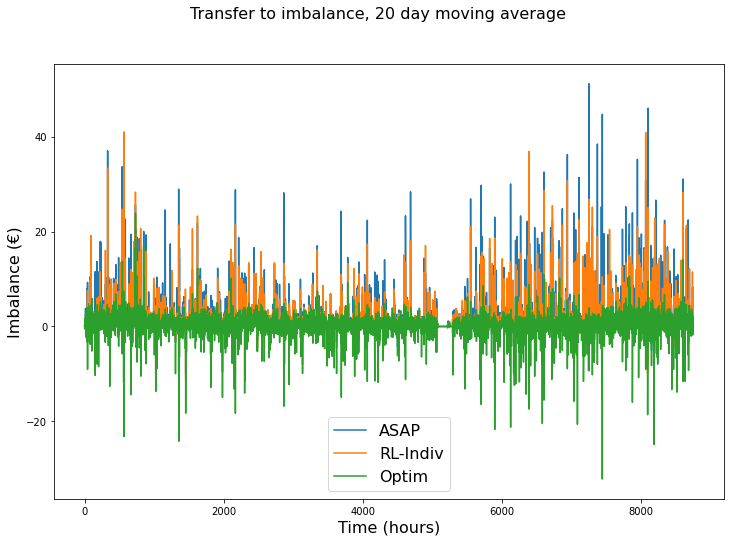

In [14]:
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(1,1,1)

ax1.plot(x, np_asap, label="ASAP")
ax1.plot(x, np_lay[:-1], label="RL-Indiv")
ax1.plot(x, np_optim, label="Optim")
ax1.legend(fontsize=16)
fig1.suptitle("Transfer to imbalance, 20 day moving average", fontsize=16)
ax1.set_xlabel("Time (hours)", fontsize=16)
ax1.set_ylabel("Imbalance (€)", fontsize=16)

# Graph

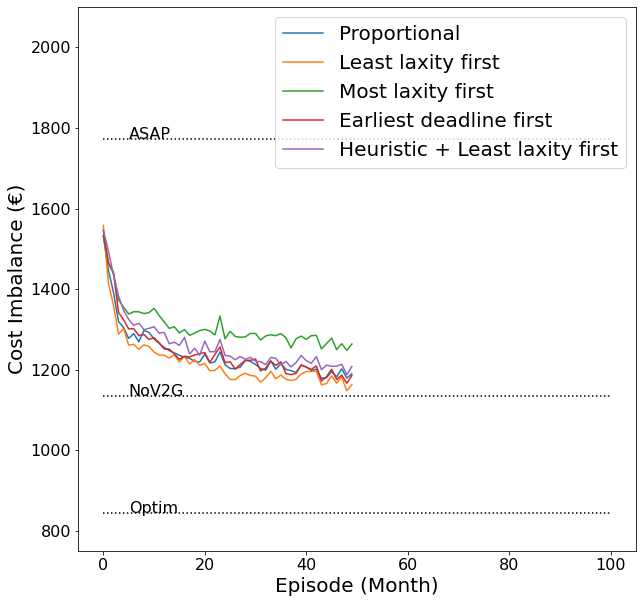

In [15]:

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(1,1,1)

fontsize = 20
ax1.hlines(np_asap[:768].sum(),  0, 100, color='k', ls=':')
ax1.text(5, np_asap[:768].sum(), "ASAP", fontsize = fontsize-4)

ax1.hlines(np_nov2g[:768].sum(),  0, 100, color='k', ls=':')
ax1.text(5, np_nov2g[:768].sum(), "NoV2G", fontsize = fontsize-4)

ax1.hlines(np_optim[:768].sum(), 0, 100, color='k', ls=':')
ax1.text(5, np_optim[:768].sum(), "Optim", fontsize = fontsize-4)

#ax1 = drawLearn("d_month/batch_9/mont_agg_nomini", 81, ax1, label = "PPO")

if True:
    #ax1 = drawLearn("d_month/batch_13/month_aggc_f", 100, ax1, label = "PPO Stalled")
    #ax1 = drawLearn("d_month/batch_14/month_sac_a", 100, ax1, label = "SAC")
    #ax1 = drawLearn("d_month/batch_14/month_sac_b", 100, ax1, label = "SAC")
    ##ax1 = drawLearn("d_month/batch_14/month_sac_k", 100, ax1, label = "SAC + new state") # Good
    #ax1 = drawLearn("d_month/batch_14/month_sac_d", 100, ax1, label = "SAC + new state 2") # Great
    #ax1 = drawLearn("d_month/batch_14/month_sac_e", 100, ax1, label = "SAC") # 
    #ax1 = drawLearn("d_month/batch_14/month_sac_j", 100, ax1) # Good
    #ax1 = drawLearn("d_month/batch_14/month_sac_l", 100, ax1) # Bad
    #ax1 = drawLearn("d_month/batch_14/month_sac_m", 100, ax1) # Bad

    #ax1 = drawLearn("d_month/batch_16/month_sac_I_b", 100, ax1)  
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_c", 100, ax1)  
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_d", 100, ax1)  
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_e", 100, ax1) # Good 
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_f", 100, ax1)   
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_g", 100, ax1) #  Great
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_h", 100, ax1)  
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_i", 100, ax1)  
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_j", 100, ax1)  
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_k", 100, ax1)  
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_l", 100, ax1)  # Great
    #ax1 = drawLearn("d_month/batch_16/month_sac_I_m", 100, ax1)  # Great +
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_b", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_c", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_d", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_e", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_f", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_g", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_h", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_i", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_j", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_k", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_l", 100, ax1)
    #ax1 = drawLearn("d_month/batch_16/month_sac_II_m", 100, ax1)

    #ax1 = drawLearn("d_month/batch_17/month_sac_III_a", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_b", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_c", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_d", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_e", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_f", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_g", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_h", 50, ax1) # good
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_i", 50, ax1) # good
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_j", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_k", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_l", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_m", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_n", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_o", 50, ax1) # no params, ok
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_p", 50, ax1) # Reference
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_q", 50, ax1) # Great, reference
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_r", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_s", 50, ax1) # Great reference
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_t", 50, ax1) # reference
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_u", 50, ax1) # Really good, autotune false atmd
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_v", 50, ax1) # Really good, autotune false atm
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_w", 50, ax1) # good
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_x", 50, ax1) # good
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_y", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_z", 50, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_A", 200, ax1) # Stalled
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_B", 200, ax1) # Stalled
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_C", 200, ax1) # Stalled
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_D", 200, ax1) # Stalled
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_E", 200, ax1) # Great +
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_F", 200, ax1) # Great
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_G", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_H", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_I", 200, ax1) # Great
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_J", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_K", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_L", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_M", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_N", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_O", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_P", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_III_Q", 200, ax1)
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_a", 50, ax1) # n         Bad
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_b", 50, ax1) # na        Good
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_c", 50, ax1) # nat        Bad
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_d", 50, ax1) # nath       Mid 
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_e", 50, ax1) # nathp     Mid 
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_f", 50, ax1) # nathm   Good
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_g", 50, ax1) # naot     Bad
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_h", 50, ax1) # nathmd  Good a basically same as o
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_i", 50, ax1) # nothmd  # Best
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_j", 50, ax1) # nat1   #
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_k", 50, ax1) # nat2   
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_l", 50, ax1) # nathmdpn # Good
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_m", 50, ax1) # natm   
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_n", 50, ax1) # nm     
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_o", 50, ax1) # nmh    
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_p", 50, ax1) # nmt    
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_q", 50, ax1) # np    Worst 
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_r", 50, ax1) # noth2  Identical  
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_s", 50, ax1) # noth1  Identical  
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_t", 50, ax1) # nothm    
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_u", 50, ax1) # nothmd  # Identical 
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_v", 50, ax1) # noth1d  # Identical 
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_w", 50, ax1) # noth2d   # Not really
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_x", 50, ax1) # nothm2d  
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_y", 50, ax1) # nothm1d  
    #ax1 = drawLearn("d_month/batch_17/month_sac_IV_z", 50, ax1) # nathmd    # Not really
    #ax1 = drawLearn("d_month/batch_17/month_sac_V_a", 200, ax1) # 
    #ax1 = drawLearn("d_month/batch_17/month_sac_V_b", 200, ax1) # --tau 0.001 # No dif
    #ax1 = drawLearn("d_month/batch_17/month_sac_V_c", 200, ax1) # --tau 0.01  # No dif
    #ax1 = drawLearn("d_month/batch_17/month_sac_V_d", 200, ax1) # --alpha 0.1 # Slightly better
    #ax1 = drawLearn("d_month/batch_17/month_sac_V_e", 200, ax1) # --alpha 0.3 # Worse 
    #ax1 = drawLearn("d_month/batch_17/month_sac_V_f", 200, ax1) # --gamma 1.0 
    #ax1 = drawLearn("d_month/batch_17/month_sac_V_g", 200, ax1) # --gamma 0.95 # Best
    #ax1 = drawLearn("d_month/batch_17/month_sac_V_h", 200, ax1) # --gamma 0.9 

    #ax1 = drawLearn("d_month/batch_17/month_sac_VI_a", 50, ax1, label = "Proportional") # Good
    #ax1 = drawLearn("d_month/batch_17/month_sac_VI_b", 50, ax1, label = "Least laxity first")  # Really good
    #ax1 = drawLearn("d_month/batch_17/month_sac_VI_c", 50, ax1, label = "Most laxity first")  # Really bad
    #ax1 = drawLearn("d_month/batch_17/month_sac_VI_d", 50, ax1, label = "Earliest deadline first")  # Somewhat good
    ##ax1 = drawLearn("d_month/batch_17/month_sac_VI_e", 50, ax1, label = "Earliest deadline last") # Bad
    #ax1 = drawLearn("d_month/batch_17/month_sac_VI_f", 50, ax1, label = "Heuristic + Least laxity first")  # Good
    ##ax1 = drawLearn("d_month/batch_17/month_sac_VI_g", 50, ax1, label = "Heuristic + Most laxity first") 
    ##ax1 = drawLearn("d_month/batch_17/month_sac_VI_h", 50, ax1, label = "Heuristic + Earliest deadline first") # Worse than poportional
    ##ax1 = drawLearn("d_month/batch_17/month_sac_VI_i", 50, ax1, label = "Heuristic + Earliest deadline last")  # Worse than poportional
    ##ax1 = drawLearn("d_month/batch_17/month_sac_VI_j", 50, ax1, label = "Soft heuristic + Least laxity first")  
    ##ax1 = drawLearn("d_month/batch_17/month_sac_VI_k", 50, ax1, label = "Soft heuristic + Least laxity last") 
    ##ax1 = drawLearn("d_month/batch_17/month_sac_VI_l", 50, ax1, label = "Old heuristic + Earliest deadline first") # Worse than poportional, old heuristic is better
    ##ax1 = drawLearn("d_month/batch_17/month_sac_VI_m", 50, ax1, label = "Soft least laxity first") # Same as proportional

    ax1 = drawLearn("month_sac_VII_a", 100, ax1, label = "Proportional") # Good
    ax1 = drawLearn("month_sac_VII_b", 100, ax1, label = "Least laxity first")  # Really good
    ax1 = drawLearn("month_sac_VII_c", 100, ax1, label = "Most laxity first")  # Really bad
    ax1 = drawLearn("month_sac_VII_d", 100, ax1, label = "Earliest deadline first")  # Somewhat good
    ax1 = drawLearn("month_sac_VII_f", 100, ax1, label = "Heuristic + Least laxity first")  # Good

#if True:
# Set fontsize of axis ticks
ax1.tick_params(axis='both', which='major', labelsize=fontsize-4)

ax1.set_xlabel("Episode (Month)", fontsize = fontsize)
ax1.set_ylabel("Cost Imbalance (€)", fontsize = fontsize)
ax1.set_ylim([750, 2100])
#ax1.legend(fontsize = 12, loc = (0.7,0.2))
ax1.legend(fontsize = fontsize)#, loc = (0.7,0.2))
# nohup python3 RunSACChargeWorld.py --agent SAC-sagg --save-name month_sac_l --years 1000 --norm-reward --state-rep om --n-state 19 &


In [8]:
l_names = ["month_aggt_a", "month_aggt_b", "month_aggt_c", "month_aggt_d", "month_aggt_e", "month_aggt_f", "month_aggt_g", "month_aggt_h", "month_aggt_i", "month_aggt_j", "month_aggt_k", "month_aggt_l", "month_aggt_m", "month_aggt_n", "month_aggt_o", "month_aggt_p", "month_aggt_q", "month_aggt_r", ]
l_counts = [50]*18
values = lat_val(l_names, l_counts)
taguchi = taguchi_l18(values)
df_taguchi = pd.DataFrame(taguchi, columns = ["anneal-lr", "gamma", "gae_lambda", "clip_coef", "vf_coef", "max_grad_norm", "ent_coef"])
df_taguchi.head()

FileNotFoundError: [Errno 2] No such file or directory: '../ExpLogs/month_aggt_a_49.csv'

In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

## Past

In [ ]:

# Batch 1
l_mont_ind_nomini                = [f"d_month/batch_9/mont_ind_nomini_{i}" for i in range(50)]
l_mont_ind_moresteps             = [f"d_month/batch_9/mont_ind_moresteps_{i}" for i in range(10)]
l_mont_ind_nomini_moresteps      = [f"d_month/batch_9/mont_ind_nomini_moresteps_{i}" for i in range(10)]
l_mont_agg_nomini                = [f"d_month/batch_9/mont_agg_nomini_{i}" for i in range(50)]
l_mont_agg_moresteps             = [f"d_month/batch_9/mont_agg_moresteps_{i}" for i in range(10)]
l_mont_agg_nomini_moresteps      = [f"d_month/batch_9/mont_agg_nomini_moresteps_{i}" for i in range(10)]

# Batch 2
#l_month_agg_nomini_norm_rew_e    = [f"d_month/batch_2/month_agg_nomini_norm_rew_e_{i}" for i in range(10)]
#l_month_agg_nomini_norm_rew_n    = [f"d_month/batch_2/month_agg_nomini_norm_rew_n_{i}" for i in range(10)]
#l_month_ind_nomini_norm_rew_e    = [f"d_month/batch_2/month_ind_nomini_norm_rew_e_{i}" for i in range(10)]
#l_month_ind_nomini_norm_rew_n    = [f"d_month/batch_2/month_ind_nomini_norm_rew_n_{i}" for i in range(10)]

# Batch 9
#l_mont_10_n_ind_nomini           = [f"d_month/batch_9/mont_10_n_ind_nomini_{i}" for i in range(100)]
#l_mont_10_n_ind_moresteps        = [f"d_month/batch_9/mont_10_n_ind_moresteps_{i}" for i in range(100)]
#l_mont_10_n_ind_nomini_moresteps = [f"d_month/batch_9/mont_10_n_ind_nomini_moresteps_{i}" for i in range(100)]
#l_mont_10_n_agg_nomini           = [f"d_month/batch_9/mont_10_n_agg_nomini_{i}" for i in range(100)]
#l_mont_10_n_agg_moresteps        = [f"d_month/batch_9/mont_10_n_agg_moresteps_{i}" for i in range(76)]
#l_mont_10_n_agg_nomini_moresteps = [f"d_month/batch_9/mont_10_n_agg_nomini_moresteps_{i}" for i in range(100)]
#l_mont_20_n_agg_nomini           = [f"d_month/batch_9/mont_20_n_agg_nomini_{i}" for i in range(100)]
#l_mont_20_n_agg_moresteps        = [f"d_month/batch_9/mont_20_n_agg_moresteps_{i}" for i in range(100)]
#l_mont_20_n_agg_nomini_moresteps = [f"d_month/batch_9/mont_20_n_agg_nomini_moresteps_{i}" for i in range(100)]
#l_mont_30_n_agg_nomini           = [f"d_month/batch_9/mont_30_n_agg_nomini_{i}" for i in range(100)]
#l_mont_30_n_agg_moresteps        = [f"d_month/batch_9/mont_30_n_agg_moresteps_{i}" for i in range(100)]
#l_mont_30_n_agg_nomini_moresteps = [f"d_month/batch_9/mont_30_n_agg_nomini_moresteps_{i}" for i in range(100)]
#l_mont_sagg_nomini               = [f"d_month/batch_9/mont_sagg_nomini_{i}" for i in range(100)]
#l_mont_1sagg_nomini              = [f"d_month/batch_9/mont_1sagg_nomini_{i}" for i in range(75)] # update
#l_mont_2sagg_nomini              = [f"d_month/batch_9/mont_2sagg_nomini_{i}" for i in range(37)]
l_mont_agg_nomini_dstd           = [f"d_month/batch_9/mont_agg_nomini_dstd_{i}" for i in range(20)]
l_mont_agg_nomini_dstd1          = [f"d_month/batch_9/mont_agg_nomini_dstd1_{i}" for i in range(50)]
l_mont_agg_nomini_dstd2          = [f"d_month/batch_9/mont_agg_nomini_dstd2_{i}" for i in range(50)]
l_mont_agg_nomini_dstd3          = [f"d_month/batch_9/mont_agg_nomini_dstd3_{i}" for i in range(50)]
l_mont_agg_nomini_dstd4          = [f"d_month/batch_9/mont_agg_nomini_dstd4_{i}" for i in range(20)]



# Batch 1
df_mont_ind_nomini               = summ_table(l_mont_ind_nomini, l_mont_ind_nomini)
df_mont_ind_moresteps            = summ_table(l_mont_ind_moresteps, l_mont_ind_moresteps)
df_mont_ind_nomini_moresteps     = summ_table(l_mont_ind_nomini_moresteps, l_mont_ind_nomini_moresteps)
df_mont_agg_nomini               = summ_table(l_mont_agg_nomini, l_mont_agg_nomini)
df_mont_agg_moresteps            = summ_table(l_mont_agg_moresteps, l_mont_agg_moresteps)
df_mont_agg_nomini_moresteps     = summ_table(l_mont_agg_nomini_moresteps, l_mont_agg_nomini_moresteps)

# Batch 2
#df_month_agg_nomini_norm_rew_e   = summ_table( l_month_agg_nomini_norm_rew_e, l_month_agg_nomini_norm_rew_e)
#df_month_agg_nomini_norm_rew_n   = summ_table( l_month_agg_nomini_norm_rew_n, l_month_agg_nomini_norm_rew_n)
#df_month_ind_nomini_norm_rew_e   = summ_table( l_month_ind_nomini_norm_rew_e, l_month_ind_nomini_norm_rew_e)
#df_month_ind_nomini_norm_rew_n   = summ_table( l_month_ind_nomini_norm_rew_n, l_month_ind_nomini_norm_rew_n)

# Batch 9
#df_mont_10_n_ind_nomini          = summ_table(l_mont_10_n_ind_nomini,           l_mont_10_n_ind_nomini)
#df_mont_10_n_ind_moresteps       = summ_table(l_mont_10_n_ind_moresteps,        l_mont_10_n_ind_moresteps)
#df_mont_10_n_ind_nomini_moresteps= summ_table(l_mont_10_n_ind_nomini_moresteps, l_mont_10_n_ind_nomini_moresteps)
#df_mont_10_n_agg_nomini          = summ_table(l_mont_10_n_agg_nomini,           l_mont_10_n_agg_nomini)
#df_mont_10_n_agg_moresteps       = summ_table(l_mont_10_n_agg_moresteps,        l_mont_10_n_agg_moresteps)
#df_mont_10_n_agg_nomini_moresteps= summ_table(l_mont_10_n_agg_nomini_moresteps, l_mont_10_n_agg_nomini_moresteps)
#df_mont_20_n_agg_nomini          = summ_table(l_mont_20_n_agg_nomini,           l_mont_20_n_agg_nomini)
#df_mont_20_n_agg_moresteps       = summ_table(l_mont_20_n_agg_moresteps,        l_mont_20_n_agg_moresteps)
#df_mont_20_n_agg_nomini_moresteps= summ_table(l_mont_20_n_agg_nomini_moresteps, l_mont_20_n_agg_nomini_moresteps)
#df_mont_30_n_agg_nomini          = summ_table(l_mont_30_n_agg_nomini,           l_mont_30_n_agg_nomini)
#df_mont_30_n_agg_moresteps       = summ_table(l_mont_30_n_agg_moresteps,        l_mont_30_n_agg_moresteps)
#df_mont_30_n_agg_nomini_moresteps= summ_table(l_mont_30_n_agg_nomini_moresteps, l_mont_30_n_agg_nomini_moresteps)

#df_mont_sagg_nomini = summ_table(l_mont_sagg_nomini, l_mont_sagg_nomini)
#df_mont_1sagg_nomini = summ_table(l_mont_1sagg_nomini, l_mont_1sagg_nomini)
#df_mont_2sagg_nomini = summ_table(l_mont_2sagg_nomini, l_mont_2sagg_nomini)
#df_mont_agg_nomini_dstd = summ_table(l_mont_agg_nomini_dstd,l_mont_agg_nomini_dstd)
df_mont_agg_nomini_dstd1 = summ_table(l_mont_agg_nomini_dstd1,l_mont_agg_nomini_dstd1)
df_mont_agg_nomini_dstd2 = summ_table(l_mont_agg_nomini_dstd2,l_mont_agg_nomini_dstd2)
df_mont_agg_nomini_dstd3 = summ_table(l_mont_agg_nomini_dstd3,l_mont_agg_nomini_dstd3)
df_mont_agg_nomini_dstd4 = summ_table(l_mont_agg_nomini_dstd4,l_mont_agg_nomini_dstd4)


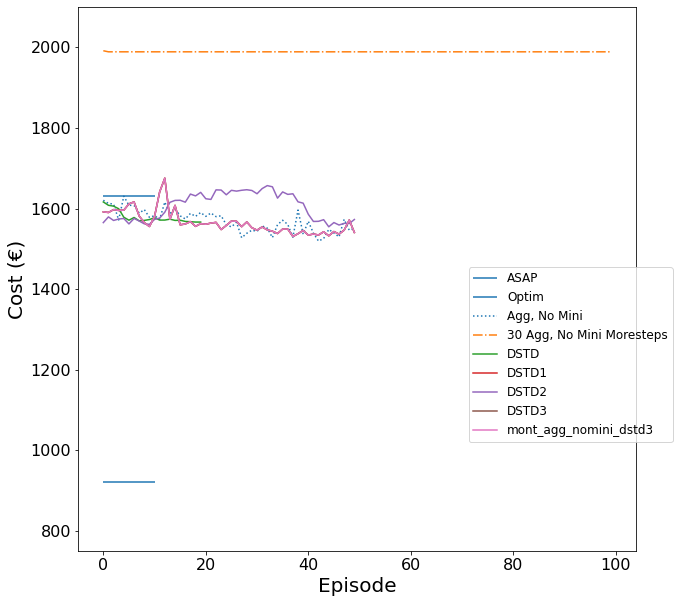

In [ ]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(1,1,1)

fontsize = 20
ax1.hlines(np_asap[:768].sum(),  0, 10,          label="ASAP")
ax1.hlines(np_optim[:768].sum(), 0, 10,          label="Optim")
#ax1.scatter([50], [1592])

# Batch 1
#ax1.plot(df_mont_ind_nomini_moresteps["transf"], label="Ind, Nomini, Moresteps", ls = ":")
#ax1.plot(df_mont_ind_moresteps["transf"],        label="Ind, Moresteps", ls=":")
#ax1.plot(df_mont_ind_nomini["transf"],           label="Ind, No Mini", ls=":")
#ax1.plot(df_mont_agg_nomini_moresteps["transf"], label="Agg, Nomini, Moresteps", ls=":")
#ax1.plot(df_mont_agg_moresteps["transf"],        label="Agg, Moresteps", ls=":")
ax1.plot(df_mont_agg_nomini["transf"],           label="Agg, No Mini", ls=":")

# Batch 2
#ax1.plot(df_month_agg_nomini_norm_rew_e["transf"], label = "Agg, No Mini, Norm Rew, E", ls ="--")
#ax1.plot(df_month_agg_nomini_norm_rew_n["transf"], label = "Agg, No Mini, Norm Rew, N", ls ="--")
#ax1.plot(df_month_ind_nomini_norm_rew_e["transf"], label = "Ind, No Mini, Norm Rew, E", ls ="--")
#ax1.plot(df_month_ind_nomini_norm_rew_n["transf"], label = "Ind, No Mini, Norm Rew, N", ls ="--")

# Batch 9
#ax1.plot(df_mont_10_n_ind_nomini["transf"], label="Ind, Nomini ", ls = "-.")
#ax1.plot(df_mont_10_n_ind_moresteps["transf"],        label="Ind, Moresteps", ls="-.")
#ax1.plot(df_mont_10_n_ind_nomini_moresteps["transf"],           label="Ind, No Mini Moresteps", ls="-.")

#ax1.plot(df_mont_10_n_agg_nomini["transf"],           label="10 Agg, Nomini", ls="-.")
#ax1.plot(df_mont_10_n_agg_moresteps["transf"],        label="10 Agg, Moresteps", ls="-.")
#ax1.plot(df_mont_10_n_agg_nomini_moresteps["transf"], label="10 Agg, No Mini Moresteps", ls="-.")

#ax1.plot(df_mont_20_n_agg_nomini["transf"],           label="20 Agg, Nomini", ls="-.")
#ax1.plot(df_mont_20_n_agg_moresteps["transf"],        label="20 Agg, Moresteps", ls="-.")
#ax1.plot(df_mont_20_n_agg_nomini_moresteps["transf"], label="20 Agg, No Mini Moresteps", ls="-.")

#ax1.plot(df_mont_30_n_agg_nomini["transf"],           label="30 Agg, Nomini", ls="-.")
#ax1.plot(df_mont_30_n_agg_moresteps["transf"],        label="30 Agg, Moresteps", ls="-.")
#ax1.plot(df_mont_30_n_agg_nomini_moresteps["transf"], label="30 Agg, No Mini Moresteps", ls="-.")
#ax1.plot(df_mont_sagg_nomini["transf"], label="1Sagg Nomini")
#ax1.plot(df_mont_1sagg_nomini["transf"], label="2Sagg Nomini")
#ax1.plot(df_mont_2sagg_nomini["transf"], label="3Sagg Nomini")
#ax1.plot(df_mont_agg_nomini_dstd["transf"], label = "DSTD")
ax1.plot(df_mont_agg_nomini_dstd1["transf"], label = "DSTD1")
ax1.plot(df_mont_agg_nomini_dstd2["transf"], label = "DSTD2")
ax1.plot(df_mont_agg_nomini_dstd3["transf"], label = "DSTD3")
#ax1.plot(df_mont_agg_nomini_dstd4["transf"], label = "DSTD4")
ax1 = drawLearn("month/batch_9/mont_agg_nomini_dstd3", 50, ax1)

# Set fontsize of axis ticks
ax1.tick_params(axis='both', which='major', labelsize=fontsize-4)

ax1.set_xlabel("Episode", fontsize = fontsize)
ax1.set_ylabel("Cost (€)", fontsize = fontsize)
ax1.set_ylim([750, 2100])
ax1.legend(fontsize = 12, loc = (0.7,0.2))


In [ ]:
2.8**-2

0.12755102040816327